# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#Three observable trends:
1. As one move toward the equator, there is rise in average temperature and maximum temperature (from Temperature-Latitude plots)
2. There is huge variability in cloudiness across all latitudes in both northern and southern hemispheres (from Cloudiness-Latitude plots)
3. Humidity near the equator is high, whereas it is more variability as one moves away from the equator towards higher latitudes (from Humidity-Latitude plots)


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"The total number of cities are: {len(cities)}")


The total number of cities are: 607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [89]:
url = "http://api.openweathermap.org/data/2.5/weather?"


City=[]
Latitude=[]
Longitude=[]
Temperature=[]
Max_Temp=[]
Min_Temp=[]
Humidity=[]
Windspeed=[]
Cloudiness=[]
Country=[]

count=1
sets=1
print("Beginning Data  Retrieval")
print("----------------------------")
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
        
    try:
        print(f"Processing Record {count} of Set {sets} | {weather_json['name']}")

        City.append(weather_json["name"])
        Country.append(weather_json["sys"]["country"])
        Latitude.append(weather_json["coord"]["lat"])
        Longitude.append(weather_json["coord"]["lon"])
        Temperature.append(weather_json["main"]["temp"])
        Max_Temp.append(weather_json["main"]["temp_max"])
        Min_Temp.append(weather_json["main"]["temp_min"])
        Humidity.append(weather_json["main"]["humidity"])
        Windspeed.append(weather_json["wind"]["speed"])
        Cloudiness.append(weather_json["clouds"]["all"])
    
    except:
        print("City not found. Skipping...")
        
    if count==50:
        count=1
        sets=sets+1
    else:    
        count=count+1
    
    


    


Beginning Data  Retrieval
----------------------------
Processing Record 1 of Set 1 | Butaritari
Processing Record 2 of Set 1 | Evensk
Processing Record 3 of Set 1 | Kapaa
Processing Record 4 of Set 1 | Vaini
Processing Record 5 of Set 1 | Cotonou
City not found. Skipping...
Processing Record 7 of Set 1 | Necochea
Processing Record 8 of Set 1 | Khartoum
Processing Record 9 of Set 1 | Jamestown
Processing Record 10 of Set 1 | Hermanus
Processing Record 11 of Set 1 | Los Llanos de Aridane
Processing Record 12 of Set 1 | Homer
Processing Record 13 of Set 1 | Ushuaia
Processing Record 14 of Set 1 | Esperance
Processing Record 15 of Set 1 | Vila Praia de Âncora
Processing Record 16 of Set 1 | Albany
Processing Record 17 of Set 1 | Jalu
Processing Record 18 of Set 1 | Novouzensk
Processing Record 19 of Set 1 | Skjervøy
Processing Record 20 of Set 1 | Imst
Processing Record 21 of Set 1 | Ayan
Processing Record 22 of Set 1 | Fortuna
Processing Record 23 of Set 1 | Cayenne
Processing Record 24 

Processing Record 3 of Set 5 | Roscommon
Processing Record 4 of Set 5 | Lata
Processing Record 5 of Set 5 | Lagoa
Processing Record 6 of Set 5 | Coquimbo
Processing Record 7 of Set 5 | Brae
Processing Record 8 of Set 5 | Batemans Bay
Processing Record 9 of Set 5 | Sédhiou
Processing Record 10 of Set 5 | Hailar
Processing Record 11 of Set 5 | Shaowu
Processing Record 12 of Set 5 | Hasaki
Processing Record 13 of Set 5 | Iztapa
Processing Record 14 of Set 5 | Ponta do Sol
Processing Record 15 of Set 5 | Ust-Tsilma
City not found. Skipping...
Processing Record 17 of Set 5 | Grand Forks
Processing Record 18 of Set 5 | Kieta
Processing Record 19 of Set 5 | Chokurdakh
Processing Record 20 of Set 5 | Fairbanks
Processing Record 21 of Set 5 | Grand Junction
Processing Record 22 of Set 5 | Narsaq
Processing Record 23 of Set 5 | Mason City
Processing Record 24 of Set 5 | Gornyy
Processing Record 25 of Set 5 | Dikson
Processing Record 26 of Set 5 | Rassvet
Processing Record 27 of Set 5 | Price
Cit

Processing Record 7 of Set 9 | Paka
Processing Record 8 of Set 9 | Lisa
Processing Record 9 of Set 9 | Camaná
Processing Record 10 of Set 9 | Raudeberg
Processing Record 11 of Set 9 | Terebovlya
Processing Record 12 of Set 9 | Waipawa
City not found. Skipping...
Processing Record 14 of Set 9 | Chernyshevskiy
Processing Record 15 of Set 9 | Rome
Processing Record 16 of Set 9 | Flinders
Processing Record 17 of Set 9 | San Clemente
Processing Record 18 of Set 9 | Tuy Hoa
Processing Record 19 of Set 9 | Mariehamn
Processing Record 20 of Set 9 | Sturgeon Bay
Processing Record 21 of Set 9 | Kousséri
Processing Record 22 of Set 9 | Lloret de Mar
Processing Record 23 of Set 9 | Dolores
Processing Record 24 of Set 9 | Phillipsburg
Processing Record 25 of Set 9 | Hay River
Processing Record 26 of Set 9 | San Patricio
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 9 | Tsumeb
Processing Record 30 of Set 9 | Deputatsky
City not found. Skipping...
Processing Reco

In [90]:
#Building the weather data frame
weather_df=pd.DataFrame({"City":City,
                         "Country":Country,
                         "Latitude":Latitude,
                         "Longitude":Longitude,
                         "Temperature":Temperature,
                         "Max_Temp":Max_Temp,
                         "Min_Temp":Min_Temp,
                         "Humidity":Humidity,
                         "Cloudiness":Cloudiness,
                         "Windspeed":Windspeed
    
})


,City,Country,Latitude,Longitude,Temperature,Max_Temp,Min_Temp,Humidity,Cloudiness,Windspeed
0,Butaritari,KI,3.0707,172.7902,301.31,301.31,301.31,65,9,3.30
1,Evensk,RU,61.9500,159.2333,285.66,285.66,285.66,50,98,4.35
2,Kapaa,US,22.0752,-159.3190,299.99,302.33,298.77,75,1,1.79
3,Vaini,TO,-21.2000,-175.2000,296.24,296.24,296.24,68,20,3.60
4,Cotonou,BJ,6.3654,2.4183,297.80,297.80,297.80,87,100,5.19


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Displaying the data frame
weather_df.head()

In [92]:
#Outputting to csv file
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
# Make a new DataFrame by dropping all cities (if any) that have humidity >100.

weather_df=weather_df[weather_df["Humidity"]<=100]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

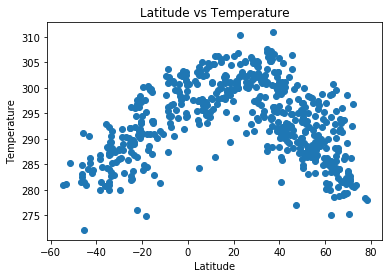

In [93]:
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

plt.scatter(weather_df["Latitude"],weather_df["Temperature"])
plt.savefig("Figure1.png")
plt.show()

## Latitude vs. Humidity Plot

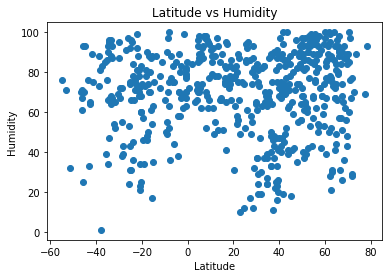

In [94]:
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.scatter(weather_df["Latitude"],weather_df["Humidity"])
plt.savefig("Figure2.png")
plt.show()

## Latitude vs. Cloudiness Plot

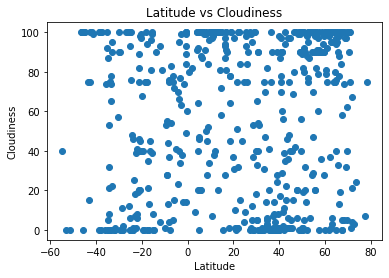

In [95]:
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])
plt.savefig("Figure3.png")
plt.show()


## Latitude vs. Wind Speed Plot

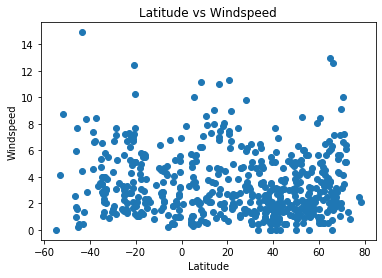

In [96]:
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.title("Latitude vs Windspeed")

plt.scatter(weather_df["Latitude"],weather_df["Windspeed"])
plt.savefig("Figure4.png")
plt.show()

In [98]:
#Function for linear regression plots
def plot_func(x_axis,y_axis):

    slope, intercept, r, p, se = linregress(x_axis, y_axis)

    regress_values=[]

    #Finding the linear regression predicted value
    for x_value in x_axis:
        regress_values.append(x_value*slope+intercept)


    #Making the scatter plot
    plt.scatter(x_axis,y_axis)

    #Making the line plot for the linear regression equation
    plt.plot(x_axis,regress_values,"r-")
    
    return slope, intercept



## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

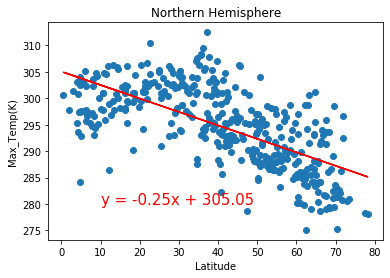

In [107]:
x_axis=weather_df[(weather_df['Latitude']>= 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]>=0]["Max_Temp"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(10,280),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp(K)')
plt.title("Northern Hemisphere")
plt.savefig("Figure5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

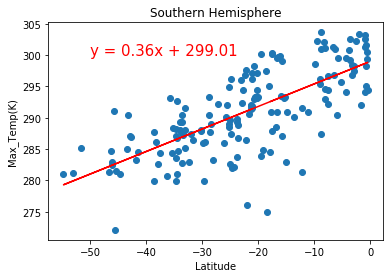

In [108]:
x_axis=weather_df[(weather_df['Latitude']< 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]<0]["Max_Temp"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp(K)')
plt.title("Southern Hemisphere")
plt.savefig("Figure6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

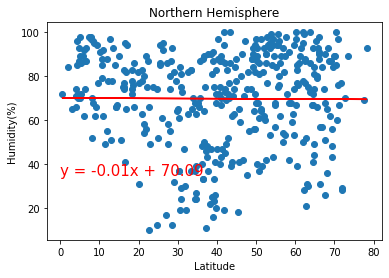

In [109]:
x_axis=weather_df[(weather_df['Latitude']>= 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]>=0]["Humidity"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Northern Hemisphere")
plt.savefig("Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

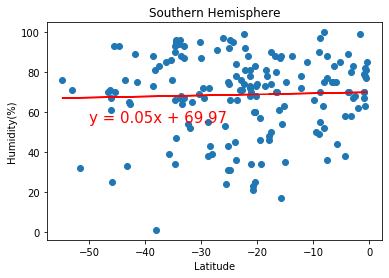

In [110]:
x_axis=weather_df[(weather_df['Latitude']< 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]<0]["Humidity"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("Southern Hemisphere")
plt.savefig("Figure8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

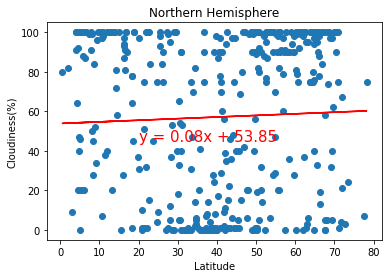

In [111]:
x_axis=weather_df[(weather_df['Latitude']>= 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]>=0]["Cloudiness"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Northern Hemisphere")
plt.savefig("Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

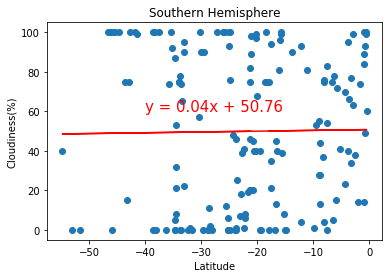

In [112]:
x_axis=weather_df[(weather_df['Latitude']< 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]<0]["Cloudiness"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("Southern Hemisphere")
plt.savefig("Figure10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

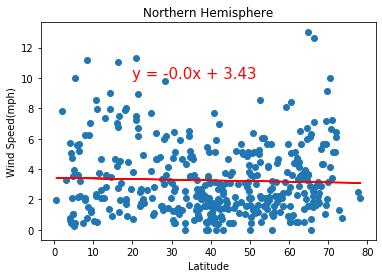

In [113]:
x_axis=weather_df[(weather_df['Latitude']>= 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]>=0]["Windspeed"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("Northern Hemisphere")
plt.savefig("Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

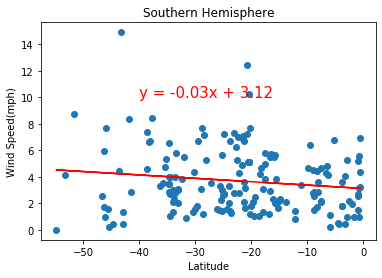

In [114]:
x_axis=weather_df[(weather_df['Latitude']< 0)]["Latitude"]
y_axis=weather_df[weather_df["Latitude"]<0]["Windspeed"]

slope, intercept=plot_func(x_axis,y_axis)
#Building the line equation for annotation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Providing the annotation of the line equation
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("Southern Hemisphere")
plt.savefig("Figure12.png")
plt.show()